```pip install box2d-py``` after installing Visual C++ and rebooting.

In [1]:

from importlib import reload
import cartpole_lab.charts
reload(cartpole_lab.charts)

import numpy as np
import gym
import cartpole_lab.agent
import cartpole_lab.deeprico
import cartpole_lab.approximator
reload(cartpole_lab.agent)
reload(cartpole_lab.deeprico)
reload(cartpole_lab.approximator)
from cartpole_lab.deeprico import deep_rico

env = gym.make('LunarLander-v2')
observation = env.reset()

Using TensorFlow backend.


In [55]:
state = env.reset()
while True:
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    env.render()
    #print('reward=%f state=%s' % (reward, state))
    if done:
        break

In [5]:
env.close()

In [51]:
env.observation_space.shape[0]

8

In [52]:
env.action_space.n

4

Can I just re-use my existing agent without changes? I just looked through the code and it looks like it'll work without changes.

In [10]:
env.reset()

array([-3.9815903e-04,  1.4120896e+00, -4.0342692e-02,  5.1981959e-02,
        4.6813677e-04,  9.1382265e-03,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)

In [11]:
env.render()

True

In [49]:
env.step(2)
env.render()

True

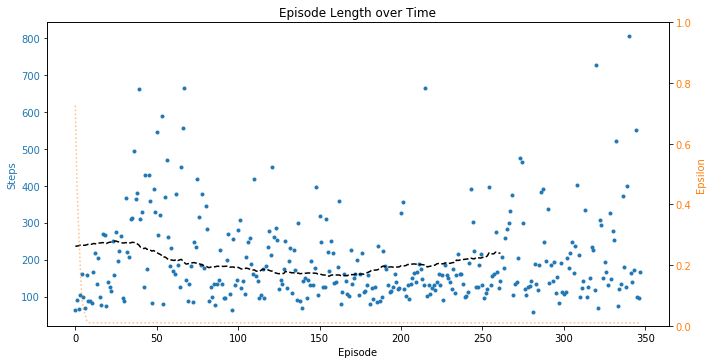

In [ ]:
agent = deep_rico(env)
agent.train(1000)